# **Made by :**

*   **Mohammed Wafiq Chahboun (114743)**
*   **Rhassan BERBER (115741)**



# **Loading the necessary imports**

In [1]:
import numpy as np
from scipy.ndimage import convolve
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step



**- `x_train`, `y_train`: Training images and labels**

**- `x_test`, `y_test`: Testing images and labels**


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

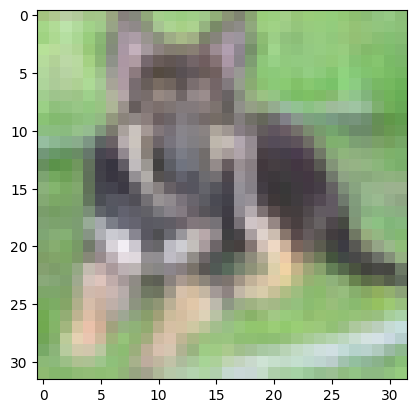

In [5]:
plt.imshow(x_train[156])

In [6]:
y_train[5]

array([1], dtype=uint8)

# **creating binary labels and filters the dataset:**

1. **Define Classes**:
   - `can_fly = [0, 2]` (airplane, bird)
   - `cannot_fly = [1, 3, 4, 5, 6, 7, 8, 9]` (others)

2. **Create Binary Labels**:
   - `y_train_bin`: 1 if "can fly", 0 if "cannot fly" for training data.
   - `y_test_bin`: Same for test data.

3. **Filter Dataset**:
   - `x_train_filtered`, `y_train_filtered`: Filtered training data and labels.
   - `x_test_filtered`, `y_test_filtered`: Filtered test data and labels.


In [7]:
# Define the classes for "can fly" (1) and "cannot fly" (0)
can_fly = [0, 2]  # 0: airplane, 2: bird
cannot_fly = [1, 3, 4, 5, 6, 7, 8, 9]  # 1: automobile, 3: cat, 4: deer, 5: dog, 6: frog, 7: horse, 8: ship, 9: truck

# Create binary labels
y_train_bin = np.where(np.isin(y_train, can_fly), 1, 0)  #<---isin checks each element in the y_train array and determines if it's present in the can_fly list (return a boolean array)
y_test_bin = np.where(np.isin(y_test, can_fly), 1, 0)    # <---- the output should be in the form of [0,1,0,0,0,0,0,1] where 1 means that the element belongs to can_fly

# Filter the dataset to include only relevant classes
train_indices = np.isin(y_train, can_fly + cannot_fly)
test_indices = np.isin(y_test, can_fly + cannot_fly)

x_train_filtered = x_train[train_indices.flatten()]
y_train_filtered = y_train_bin[train_indices.flatten()]

x_test_filtered = x_test[test_indices.flatten()]
y_test_filtered = y_test_bin[test_indices.flatten()]

# **Defining a CNN model using TensorFlow's Keras API:**

1. **Model Architecture**:
   - Sequential model with input shape (32, 32, 3).
   - Three sets of Conv2D and MaxPooling2D layers to extract features.
   - Flatten layer to convert 2D feature maps into a 1D feature vector.
   - Two Dense layers for classification.

2. **Compilation**:
   - Loss function: Binary crossentropy.
   - Optimizer: Adam.
   - Metrics: Accuracy.

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)         0

# **Training the defined model:**

- **Training Data**: `x_train_filtered` and `y_train_filtered`.
- **Parameters**:
  - Epochs: 10
  - Batch Size: 32
  - Validation Split: 20% of training data for validation.

The model will undergo 10 epochs of training with a batch size of 32, and 20% of the training data will be used for validation during each epoch.

In [9]:
history = model.fit(
    x_train_filtered, y_train_filtered,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/10
1250/1250 [==============================] - 89s 70ms/step - loss: 0.6081 - accuracy: 0.8231 - val_loss: 0.3603 - val_accuracy: 0.8495
Epoch 2/10
1250/1250 [==============================] - 92s 73ms/step - loss: 0.3524 - accuracy: 0.8523 - val_loss: 0.3358 - val_accuracy: 0.8615
Epoch 3/10
1250/1250 [==============================] - 88s 70ms/step - loss: 0.3188 - accuracy: 0.8680 - val_loss: 0.3106 - val_accuracy: 0.8769
Epoch 4/10
1250/1250 [==============================] - 90s 72ms/step - loss: 0.2958 - accuracy: 0.8784 - val_loss: 0.2974 - val_accuracy: 0.8810
Epoch 5/10
1250/1250 [==============================] - 90s 72ms/step - loss: 0.2744 - accuracy: 0.8878 - val_loss: 0.3035 - val_accuracy: 0.8793
Epoch 6/10
1250/1250 [==============================] - 87s 70ms/step - loss: 0.2537 - accuracy: 0.8972 - val_loss: 0.3262 - val_accuracy: 0.8707
Epoch 7/10
1250/1250 [==============================] - 88s 70ms/step - loss: 0.2303 - accuracy: 0.9063 - val_loss: 0.3043 -

# **Making predictions using the trained model:**

- **Predictions Probability**: `predictions_prob`: Probability scores for each test sample.
- **Predictions**: `predictions`: Converted to binary predictions using a threshold of 0.5. If the probability is greater than 0.5, it's classified as 1 (can fly); otherwise, it's classified as 0 (cannot fly).

In [10]:
predictions_prob = model.predict(x_test)
predictions = (predictions_prob > 0.5).astype(int)

313/313 [==============================] - 7s 22ms/step


# **Computing various evaluation metrics for the model's performance:**

- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives.
- **Recall**: The ratio of correctly predicted positive observations to the all observations in the actual class.
- **F1 Score**: The weighted average of precision and recall.
- **Accuracy**: The ratio of correctly predicted observations to the total observations.

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

precision = precision_score(y_test_filtered, predictions)
recall = recall_score(y_test_filtered, predictions)
f1 = f1_score(y_test_filtered, predictions)
accuracy = accuracy_score(y_test_filtered, predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

Precision: 0.7776365946632783
Recall: 0.612
F1 Score: 0.684946838276441
Accuracy: 0.8874



# **Confusion Matrix**:
  - Rows represent the actual classes (true labels).
  - Columns represent the predicted classes.
  
Each cell in the matrix shows the count of samples that fall into a particular combination of actual and predicted classes.

In [12]:
conf_matrix = confusion_matrix(y_test_filtered, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[7650  350]
 [ 776 1224]]


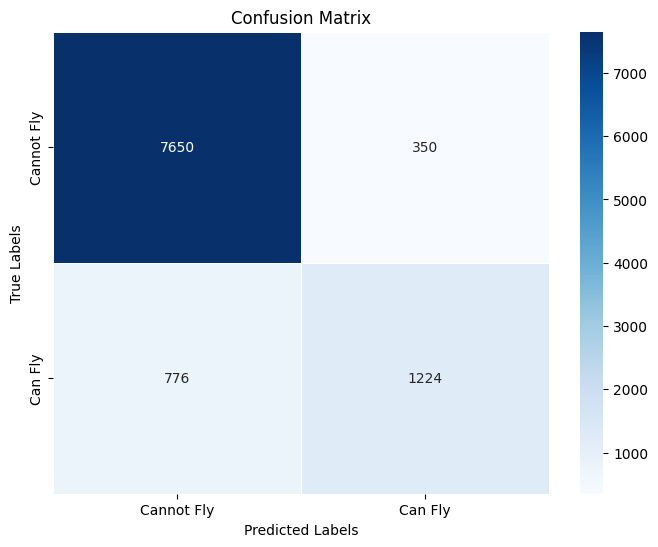

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, cmap="Blues", xticklabels=['Cannot Fly', 'Can Fly'], yticklabels=['Cannot Fly', 'Can Fly'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



# **plot of the training and validation loss and accuracy over epochs:**

1. **Loss Plot**:
   - Subplot 1: Plots training and validation loss.
   - X-axis: Epoch.
   - Y-axis: Loss.
   - Legend: Train vs. Validation loss.

2. **Accuracy Plot**:
   - Subplot 2: Plots training and validation accuracy.
   - X-axis: Epoch.
   - Y-axis: Accuracy.
   - Legend: Train vs. Validation accuracy.

This visualizes the model's performance during training.

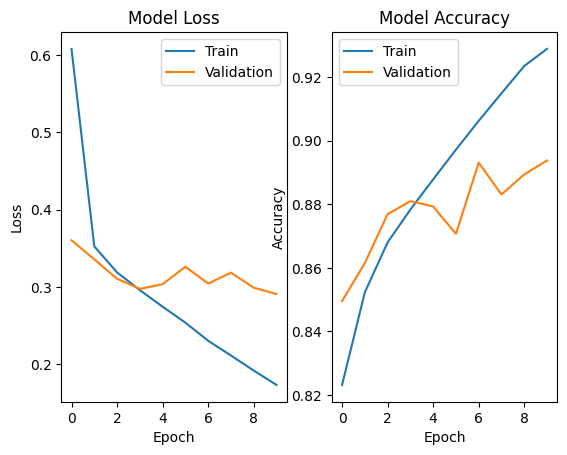

In [14]:
# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Show the plots
plt.show()

#**Model Performances:**
*   As training progresses, the loss continualy decreases over the epochs as the accuracy steadily increases.





